<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/AbiolData_Scientist_Python_Excercise_your_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Please enter your name
# Abiola David Obembe

In [2]:
# 2. Read the csv files
import pandas as pd
import numpy as np

df_macro = pd.read_csv("USDA_Macronutrients.csv")
df_micro = pd.read_csv("USDA_Micronutrients.csv")

print("The shape of df_macro is:", df_macro.shape)
print("The shape of df_micro is:", df_micro.shape)

The shape of df_macro is: (7057, 6)
The shape of df_micro is: (7057, 10)


In [3]:
# 3. Merge the data frames using the variable "ID". Name the Merged Data Frame "USDA".
# For my analysis, I joined both daframes using inner join

USDA = pd.merge(df_macro, df_micro, how ="inner", on = 'ID') 
print(USDA)
print("The shape of merged dataframe  is:", USDA.shape)


         ID  ... VitaminD
0      2047  ...      0.0
1      2048  ...      0.0
2      2053  ...      0.0
3      2073  ...      NaN
4      6597  ...      NaN
...     ...  ...      ...
7052  35014  ...      5.7
7053  35084  ...      NaN
7054  35087  ...      NaN
7055  42289  ...      0.0
7056  44005  ...      0.0

[7057 rows x 15 columns]
The shape of merged dataframe  is: (7057, 15)


In [4]:
# 4. Prepare the dataset for analysis.
USDA.replace("?", np.nan, inplace= True)
# Check for missing values
missing_values = USDA.isnull().sum().sum()

print("The number of missing values is:", missing_values)
USDA.head()

The number of missing values is: 8827


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,"38,758",0.0,0.00,24.0,0.33,8,0.0,0.0,0.0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5,0.0,0.40,7.0,0.20,73,0.0,0.0,0.0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2,0.0,0.04,6.0,0.03,2,0.0,0.0,0.0
3,2073,"CAMPBELL SOUP CO,PACE,DRY TACO SEAS MIX",188,0.0,0.0,56.29,"8,068",0.0,18.76,NaN,6.75,NaN,45.0,NaN,NaN
4,6597,"CAMPBELL SOUP COMPANY,PACE,CHIPOTLE CHUNKY SALSA",25,0.0,0.0,6.25,719,0.0,6.25,0.0,0.00,NaN,0.0,NaN,NaN


In [5]:
# Check data type for each column
USDA.dtypes

ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium           object
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium        object
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [6]:
# Change Potassium column data type to float64
USDA['Sodium'] = pd.to_numeric(USDA['Sodium'],errors='coerce')
USDA['Potassium'] = pd.to_numeric(USDA['Potassium'],errors='coerce')
USDA.dtypes

ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [7]:
# 5. Remove records with missing values in 4 or more vectors.
USDA.dropna( axis = 0, thresh= 3, inplace= True)
USDA.head()


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,NaN,0.0,0.00,24.0,0.33,8.0,0.0,0.0,0.0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40,7.0,0.20,73.0,0.0,0.0,0.0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04,6.0,0.03,2.0,0.0,0.0,0.0
3,2073,"CAMPBELL SOUP CO,PACE,DRY TACO SEAS MIX",188,0.0,0.0,56.29,NaN,0.0,18.76,NaN,6.75,NaN,45.0,NaN,NaN
4,6597,"CAMPBELL SOUP COMPANY,PACE,CHIPOTLE CHUNKY SALSA",25,0.0,0.0,6.25,719.0,0.0,6.25,0.0,0.00,NaN,0.0,NaN,NaN


In [8]:
# 6. For records with missing values for Sugar, Vitamin E and Vitamin D, replace missing values with mean value for the respective vector.
USDA.fillna(value= USDA[["Sugar", "VitaminE","VitaminD" ]].mean())

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,NaN,0.0,0.00000,24.0,0.33,8.0,0.0,0.000000,0.000000
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40000,7.0,0.20,73.0,0.0,0.000000,0.000000
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04000,6.0,0.03,2.0,0.0,0.000000,0.000000
3,2073,"CAMPBELL SOUP CO,PACE,DRY TACO SEAS MIX",188,0.0,0.0,56.29,NaN,0.0,18.76000,NaN,6.75,NaN,45.0,1.487462,0.576918
4,6597,"CAMPBELL SOUP COMPANY,PACE,CHIPOTLE CHUNKY SALSA",25,0.0,0.0,6.25,719.0,0.0,6.25000,0.0,0.00,NaN,0.0,1.487462,0.576918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7052,35014,"OIL,BELUGA,WHALE (ALASKA NATIVE)",900,0.0,100.0,0.00,0.0,NaN,0.00000,0.0,0.00,0.0,NaN,8.270000,5.700000
7053,35084,"OIL,WALRUS (ALASKA NATIVE)",900,0.0,100.0,0.00,NaN,120.0,8.25654,0.0,NaN,NaN,NaN,1.487462,0.576918
7054,35087,"OIL,WHALE,BOWHEAD (ALASKA NATIVE)",900,0.0,100.0,0.00,NaN,NaN,8.25654,0.0,0.00,NaN,NaN,1.487462,0.576918
7055,42289,"OIL,CORN AND CANOLA",884,0.0,100.0,0.00,0.0,0.0,0.00000,0.0,0.00,0.0,0.0,14.840000,0.000000


In [9]:
# 7. With a single line of code, remove all remaining records with missing values. Name the new Data Frame "USDAclean"

USDAclean = USDA.dropna(axis = 0)
USDAclean.reset_index(drop = True, inplace= True)
USDAclean.head()


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40,7.0,0.20,73.0,0.0,0.00,0.0
1,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04,6.0,0.03,2.0,0.0,0.00,0.0
2,6971,"SAUCE,WORCESTERSHIRE",78,0.0,0.0,19.46,980.0,0.0,10.03,107.0,5.30,800.0,13.0,0.08,0.0
3,14037,"ALCOHOLIC BEV,DISTILLED,ALL (GIN,RUM,VODKA,WHI...",231,0.0,0.0,0.00,1.0,0.0,0.00,0.0,0.04,2.0,0.0,0.00,0.0
4,14049,"ALCOHOLIC BEV,DISTILLED,GIN,90 PROOF",263,0.0,0.0,0.00,2.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0


In [10]:
# 8. Which food has the highest sodium level?
USDA_new = USDAclean.copy() 
USDA_new.set_index('Description', inplace= True)
ID = np.argmax(USDA_new['Sodium'].values)

print(" The food with the highest sodium level is :", USDA_new.iloc[ID])



 The food with the highest sodium level is : ID              43391.00
Calories          162.00
Protein            29.30
TotalFat            5.00
Carbohydrate        0.00
Sodium            996.00
Cholesterol        76.00
Sugar               0.00
Calcium            25.00
Iron                1.78
Potassium         298.00
VitaminC            0.00
VitaminE            0.33
VitaminD            0.10
Name: TURKEY,LT OR DK MEAT,SMOKED,CKD,SKN & BONE REMOVED, dtype: float64


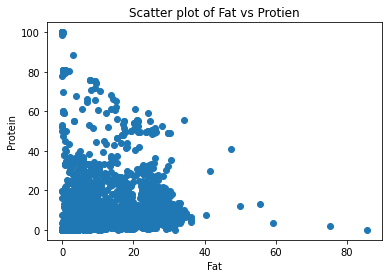

In [11]:
# 9. Create a scatter plot using Protein and Fat, with the plot title “Fat vs Protein”, labeling the axes “Fat” and “Protein”, and making the data points red.

import matplotlib.pyplot as plt

%matplotlib inline


plt.scatter(USDAclean["Protein"], USDAclean["TotalFat"])
plt.title("Scatter plot of Fat vs Protien")
plt.xlabel("Fat")
plt.ylabel("Protein")
plt.show()

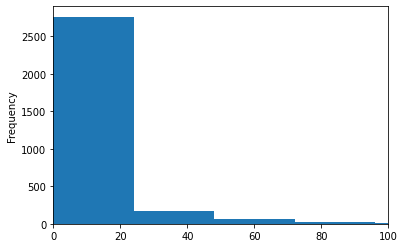

In [12]:
# 10. Create a histogram of Vitamin C distribution in foods, with a limit of 0 to 100 on the x-axis and breaks of 100.

USDAclean['VitaminC']. plot( kind = 'hist', bins = 100)
plt. xlim(0,100)
plt.show()

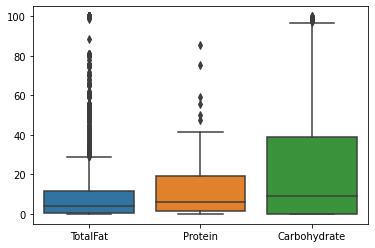

In [13]:
# 11. Create a box and whisker plot to illustrate the distribution of values for Total Fat, Protein and Carbohydrate.
import seaborn as sns

sns.boxplot(data = USDAclean[["TotalFat", "Protein", "Carbohydrate"]])
plt.show()


In [14]:
# 12. Based on this visualization alone, would you recommend removing outliers? Why or why not?
#  I will recommend using outliers as the boxplot indicates the presence of outliers especially in the TotalFat and Protein Columns

In [15]:
# 13. Add a new variable to the data frame that takes value 1 if the food has higher calories than average, 0 otherwise. Call this variable HighCals. 

avg_calories = USDAclean["Calories"].values. mean()
avg_calories

USDAclean["HighCals"] = (USDAclean['Calories'] > avg_calories).astype('int')

USDAclean.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighCals
0,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5.0,0.0,0.40,7.0,0.20,73.0,0.0,0.00,0.0,0
1,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2.0,0.0,0.04,6.0,0.03,2.0,0.0,0.00,0.0,0
2,6971,"SAUCE,WORCESTERSHIRE",78,0.0,0.0,19.46,980.0,0.0,10.03,107.0,5.30,800.0,13.0,0.08,0.0,0
3,14037,"ALCOHOLIC BEV,DISTILLED,ALL (GIN,RUM,VODKA,WHI...",231,0.0,0.0,0.00,1.0,0.0,0.00,0.0,0.04,2.0,0.0,0.00,0.0,1
4,14049,"ALCOHOLIC BEV,DISTILLED,GIN,90 PROOF",263,0.0,0.0,0.00,2.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1


In [16]:
# 14. Calculate the average amount of iron by high and low calories (i.e. average amount of iron in foods with high calories and average amount of iron in foods with low calories).  


In [17]:
# 15. Split USDAclean into a training and test set with a 70:30 split ratio.

X = USDAclean.iloc[:, 2:-1].values
y = USDAclean.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3)


In [19]:
# 16. Create a logistic regression model, using High Calories as the dependent variable, and Carbohydrate, Protein, Total Fat and Sodium as independent variables. 
X_new = USDAclean[['Carbohydrate','TotalFat', 'Sodium']].values
y_new = USDAclean['HighCals'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X_new, y_new, test_size=0.3)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_train)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_hat)
print(cm)
accuracy_score(y_train, y_hat)


[[1193   40]
 [  66  838]]


0.9503977538605521

In [20]:
# Since using Scikit-learn library the p-values are not clear , we use the scipy library
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.157147
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2137
Model:                          Logit   Df Residuals:                     2134
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 Oct 2020   Pseudo R-squ.:                  0.7693
Time:                        23:59:49   Log-Likelihood:                -335.82
converged:                       True   LL-Null:                       -1455.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2578      0.164     19.815      0.000       2.936       3.580
x2             7.1180      0.

In [ ]:
# 17. Which independent variable is not significant?
# Sodium is not significant as the p value is greater than 0.1


In [ ]:
# 18. Which independent variable has the strongest positive predictive power in the model?
# Total fat seems to have the strongest positive predictive power in the model

In [21]:
# 19. Refine the model and then test it using the test dataset to predict High Calories.
 # Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 94.99 %
Best Parameters: {'C': 0.5}


In [22]:
#  20. Produce a confusion matrix (table) for the predictions on the test set and calculate overall accuracy.
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[519  20]
 [ 18 359]]


0.9585152838427947

Thank you for completing this excercise! Save your notebook and send it back to us.